In [11]:
# !pip install ray==2.2.0
import ray
print(ray.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload

import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
# import matplotx
from ray.tune import ExperimentAnalysis
from helpers import plot_curves

import sys
sys.path.append('../')

from helpers import plot_all

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('deep').as_hex())
# plt.rcParams.update({'font.size': 16})

2.2.0


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
env = "highly_crippled_ant"

metric = "mean_avg_return"
mode = "max"
n_epochs = 5000
std_multiplier = 0.1

experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_one_trajectory/PPOGAILImit/main_2023-06-15_22-09-45
experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_one_trajectory/PPOGAIL-SImit/main_2023-06-15_22-16-12
experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_one_trajectory/PPOAIRLImit/main_2023-06-15_06-57-47
experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_one_trajectory/PPOI2LImit/main_2023-06-15_05-35-25


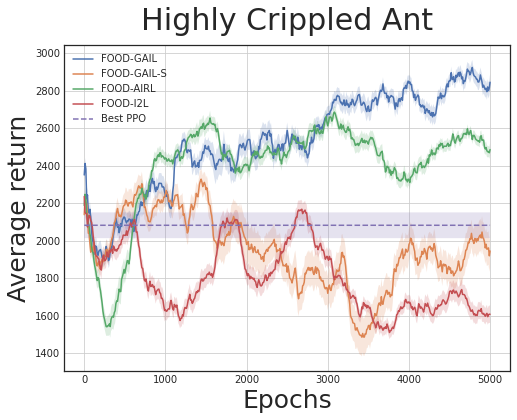

In [17]:
fig = plt.figure(figsize=(8, 6))

# agents = [
#     "PPO",
# ]

# hps = [
#     "imit_coef",
# ]

# plot_all(env, 
#          agents,
#          use_one_trajectory=False,
#          std_multiplier=std_multiplier,
#          rolling_mean=0.1,
#          init_path="..", 
#          hps=hps, 
#          chosen_max=n_epochs,
#          n_epochs=n_epochs,
#          metric="mean_avg_return", 
#          mode="max", 
#          to_plot="final")

agents = [
    "PPOGAILImit",
    "PPOGAIL-SImit",
]

hps = [
    "imit_coef",
    "type_gail"
]

plot_all(env, 
         agents,
         use_one_trajectory=True,
         std_multiplier=std_multiplier,
         rolling_mean=0.1,
         init_path="..", 
         hps=hps, 
         chosen_max=n_epochs,
         n_epochs=n_epochs,
         metric="mean_avg_return", 
         mode="max", 
         to_plot="final")

agents = [
    "PPOAIRLImit",
    "PPOI2LImit",
]

hps = [
    "imit_coef",
]

plot_all(env, 
         agents,
         use_one_trajectory=True,
         std_multiplier=std_multiplier,
         rolling_mean=0.1,
         init_path="..", 
         hps=hps, 
         chosen_max=n_epochs,
         n_epochs=n_epochs,
         metric="mean_avg_return", 
         mode="max", 
         to_plot="final")


ppo_mean = np.ones(5000) * 2082
ppo_std = 688
plt.plot(ppo_mean, '--', label="Best PPO")
plt.fill_between(range(5000),
                 ppo_mean - std_multiplier * ppo_std,
                 ppo_mean + std_multiplier * ppo_std,
                 alpha=0.2)

plt.xlabel("Epochs", fontsize=25)
plt.ylabel("Average return", fontsize=25)
plt.title("Highly Crippled Ant", fontsize=30, pad=15)

plt.legend()

plt.savefig('imitation_highly_crippled_ant.pdf')

plt.show()

In [18]:
!pwd

/home/pdaoudi/Projects/on_policy_sim2real/notebooks


## Regularization

experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_one_trajectory/PPOGAILImit/main_2023-06-15_22-09-45


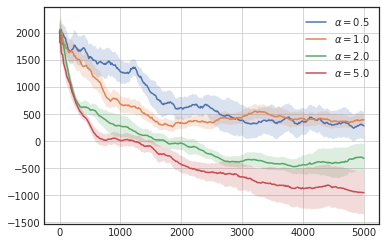

In [5]:
agents = [
    "PPOGAILImit",
]

hps = [
    "imit_coef",
    "type_gail"
]

plot_all(env, 
         agents,
         use_one_trajectory=True,
         std_multiplier=std_multiplier,
         rolling_mean=0.1,
         hyperparam_comparison='imit_coef',
         set_hyperparam={'type_gail': 'original'},
         init_path="..", 
         hps=hps, 
         chosen_max=n_epochs,
         n_epochs=n_epochs,
         metric="mean_avg_return", 
         mode="max", 
         to_plot="final")

plt.legend()

experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_one_trajectory/PPOGAILImit/main_2023-06-15_22-09-45


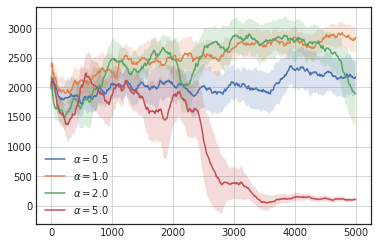

In [6]:
agents = [
    "PPOGAILImit",
]

hps = [
    "imit_coef",
    "type_gail"
]

plot_all(env, 
         agents,
         use_one_trajectory=True,
         std_multiplier=std_multiplier,
         rolling_mean=0.1,
         hyperparam_comparison='imit_coef',
         set_hyperparam={'type_gail': 'ikostrikov'},
         init_path="..", 
         hps=hps, 
         chosen_max=n_epochs,
         n_epochs=n_epochs,
         metric="mean_avg_return", 
         mode="max", 
         to_plot="final")

plt.legend()

## Sim vs Real

experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_only_sim/PPO/main_2023-06-14_01-18-00
experiment_checkpoint_path: ../ray_results/highly_crippled_ant/use_only_sim/PPO/main_2023-06-14_01-18-00


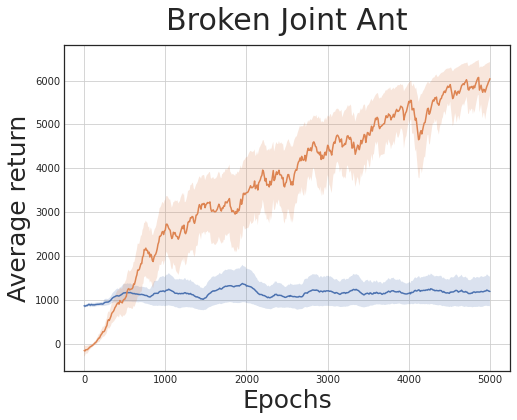

In [8]:
fig = plt.figure(figsize=(8, 6))

agents = [
    "PPO",
]

hps = [
    "imit_coef",
]

plot_all(env, 
         agents,
         use_one_trajectory=True,
         std_multiplier=std_multiplier,
         rolling_mean=0.1,
         init_path="..", 
         hps=hps, 
         chosen_max=n_epochs,
         n_epochs=n_epochs,
         metric="mean_avg_return", 
         mode="max", 
         to_plot="final")

plot_all(env, 
         agents,
         use_one_trajectory=True,
         std_multiplier=std_multiplier,
         rolling_mean=0.1,
         init_path="..", 
         hps=hps, 
         chosen_max=n_epochs,
         n_epochs=n_epochs,
         metric="sim_mean_avg_return", 
         mode="max", 
         to_plot="final")


plt.xlabel("Epochs", fontsize=25)
plt.ylabel("Average return", fontsize=25)
plt.title("Broken Joint Ant", fontsize=30, pad=15)


plt.show()